# Trabajo Práctico: Predicciones de Profit (Companie)  y Type (Pokemon)
**Materia:** Minería de Datos (MD)

**Año académico:** 2024

**Período lectivo:** 1° cuatrimestre

**Integrantes:**
- Moresco Brisa
- Britos Julián Francisco

# Librerías

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import export_text
from sklearn.calibration import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



# Carga de datos

In [ ]:
'''
Contexto:
El conjunto de datos proporcionado consta de los datos de ganancias de la empresa y sus gastos.
'''

file_path= '1000_Companies.csv'
companies = pd.read_csv(file_path, sep=',',engine='python')

# Contenido obtenido de: www.kaggle.com/datasets/subhamp7/company-profit-and-expenditures

In [ ]:
'''
Contexto:
Este conjunto de datos contiene información sobre los 802 Pokemon de las Siete Generaciones de Pokemon. La información contenida en
este conjunto de datos incluye estadísticas básicas, rendimiento contra otros tipos, altura, peso, clasificación, pasos de huevo,
puntos de experiencia, habilidades, etc.


Contenido:
Name: El nombre en inglés del Pokemon
Type: El tipo del Pokemon
HP: El HP Base del Pokemon
Attack: El Ataque Base del Pokemon
Defense: La Defensa Base del Pokemon
Sp. Atk: El Ataque Especial Base del Pokemon
Sp. Def: La Defensa Especial Base del Pokemon
Speed: La Velocidad Base del Pokemon
'''


file_path= 'PokemonDB.csv'
PokemonDB = pd.read_csv(file_path, sep=',',engine='python')

#Contenido obtenido de:www.kaggle.com/datasets/rounakbanik/pokemon

# Análisis estadístico descriptivo

## Análisis estadístico descriptivo de Companies

### Visualización de datos

Examinaremos los datos para un primer vistazo.

In [ ]:
companies

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


A continuación, examinaremos qué tipos de variables son las columnas.

In [ ]:
companies.dtypes

RyD_Spend         float64
Administration    float64
MarketingSpend    float64
State              object
Profit            float64
dtype: object

Investiguemos la presencia de valores nulos en los datos.

In [ ]:
companies.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

Vemos si hay valores duplicados

In [ ]:
companies[companies.duplicated(keep=False)]

,RyD_Spend,Administration,MarketingSpend,State,Profit
335,84533.0,122941.3141,231885.6935,California,121248.7116
755,84533.0,122941.3141,231885.6935,California,121248.7116


Vemos que hay un valor duplicado, este los eliminaremos posteriormente.

Para concluir nuestra primera inspección, veremos las estadísticas descriptivas del conjunto de datos.

In [ ]:
companies.describe(include='all')

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,344,NaN
mean,81668.927200,122963.897612,226205.058419,NaN,119546.164656
std,46537.567891,12613.927535,91578.393542,NaN,42888.633848
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,43084.500000,116640.684850,150969.584600,NaN,85943.198543
50%,79936.000000,122421.612150,224517.887350,NaN,117641.466300
75%,124565.500000,129139.118000,308189.808525,NaN,155577.107425


### Gráficos

#### State

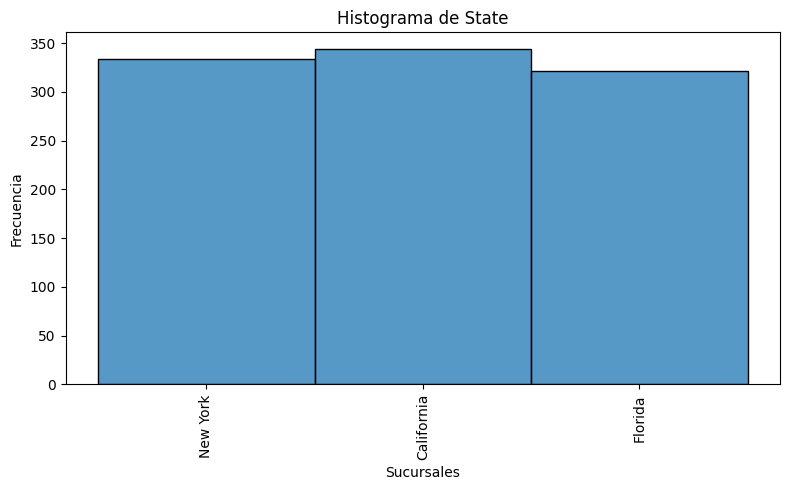

count           1000
unique             3
top       California
freq             344
Name: State, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(companies['State'])
axs.set_title('Histograma de State')
axs.set_xlabel('Sucursales')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

companies['State'].describe()


**Histograma:**

El histograma muestra la distribución de las ubicaciones. Cada barra en el histograma representa la frecuencia de una ubicación específica dentro del conjunto de datos.

**Interpretación:**

Se observa que la frecuencia varía entre las diferentes ubicaciones, lo que indica que algunas ubicaciones tienen más observaciones que otras en el conjunto de datos.

#### RyD_Spend

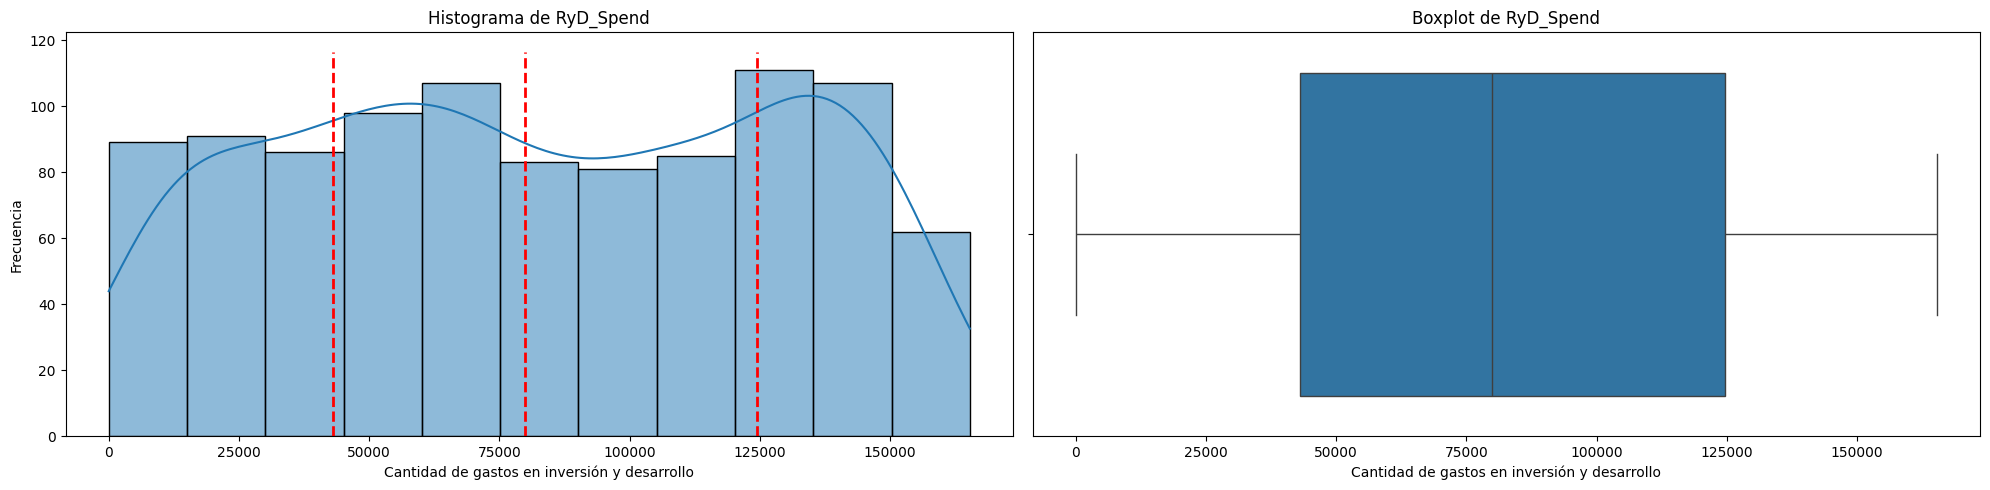

count      1000.000000
mean      81668.927200
std       46537.567891
min           0.000000
25%       43084.500000
50%       79936.000000
75%      124565.500000
max      165349.200000
Name: RyD_Spend, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['RyD_Spend'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de RyD_Spend')
axs[0].set_xlabel('Cantidad de gastos en inversión y desarrollo')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = companies['RyD_Spend'].quantile(0.25)
q2 = companies['RyD_Spend'].quantile(0.5)
q3 = companies['RyD_Spend'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=companies['RyD_Spend'], ax=axs[1])
axs[1].set_title('Boxplot de RyD_Spend')
axs[1].set_xlabel('Cantidad de gastos en inversión y desarrollo')

plt.tight_layout()
plt.show()

companies['RyD_Spend'].describe()

**Histograma:**

El histograma muestra la distribución de la cantidad de gastos en inversion y desarrollo. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad de gastos en inversion y desarrollo no se concentran alrededor de un rango específico, lo que no indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad de gastos en inversion y desarrollo. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de gastos no presentan valores extremos significativos.

**Interpretación:**

En general, la distribución de los gastos en inversión y desarrollo en los datos presenta una tendencia central, con la mayoría de los  gastos en inversión y desarrollo concentrándose alrededor de 79936.0 . La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a los gastos en inversión y desarrollo. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Administration

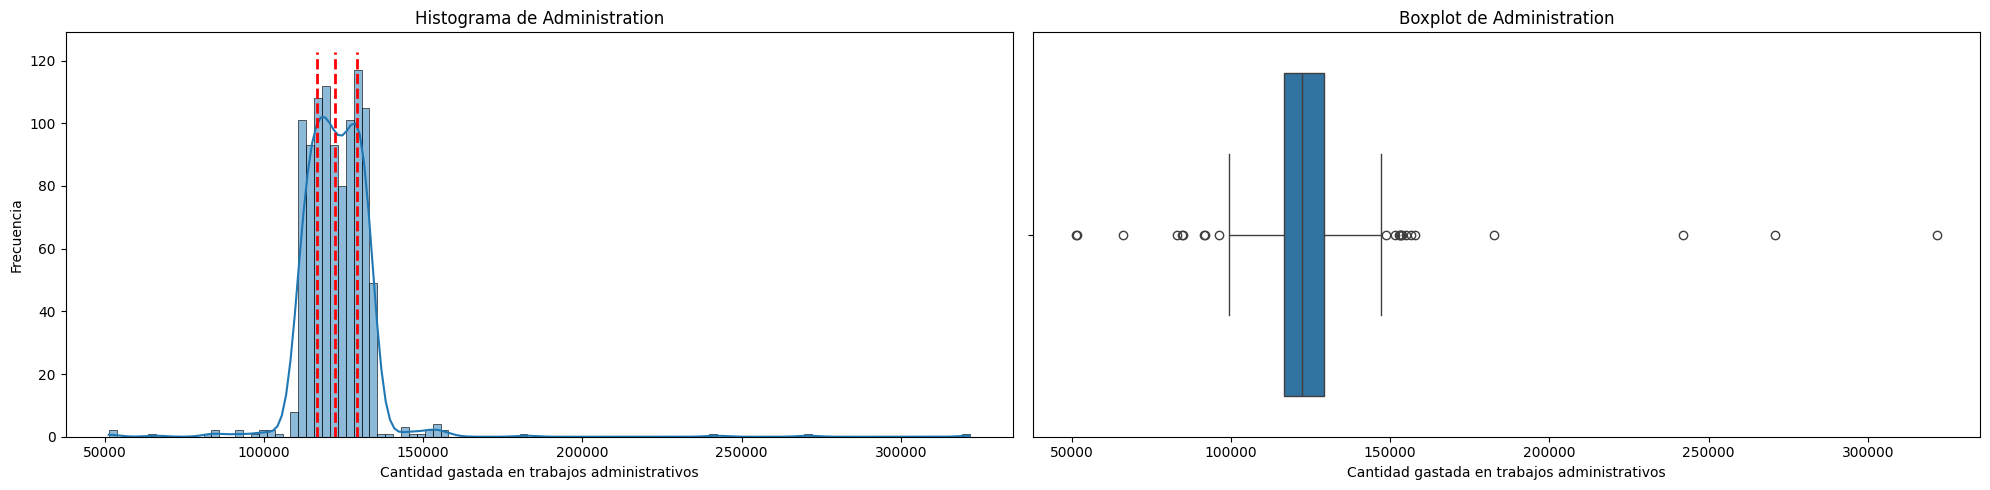

count      1000.000000
mean     122963.897612
std       12613.927535
min       51283.140000
25%      116640.684850
50%      122421.612150
75%      129139.118000
max      321652.140000
Name: Administration, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['Administration'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de Administration')
axs[0].set_xlabel('Cantidad gastada en trabajos administrativos')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = companies['Administration'].quantile(0.25)
q2 = companies['Administration'].quantile(0.5)
q3 = companies['Administration'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=companies['Administration'], ax=axs[1])
axs[1].set_title('Boxplot de Administration')
axs[1].set_xlabel('Cantidad gastada en trabajos administrativos')

plt.tight_layout()
plt.show()

companies['Administration'].describe()


**Histograma:**

El histograma muestra la distribución de la cantidad gastada en trabajos administrativos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada en trabajos administrativos se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad gastada en trabajos administrativos. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de la cantidad gastos en trabajos administrativos significativamente altos.

**Interpretación:**

En general, la distribución de la cantidad gastada en trabajos administrativos en los datos  presenta una tendencia central, con la mayoría de la cantidad gastada en trabajos administrativos concentrándose alrededor de 122421.61. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de la cantidad gastada en trabajos administrativos significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.



#### MarketingSpend

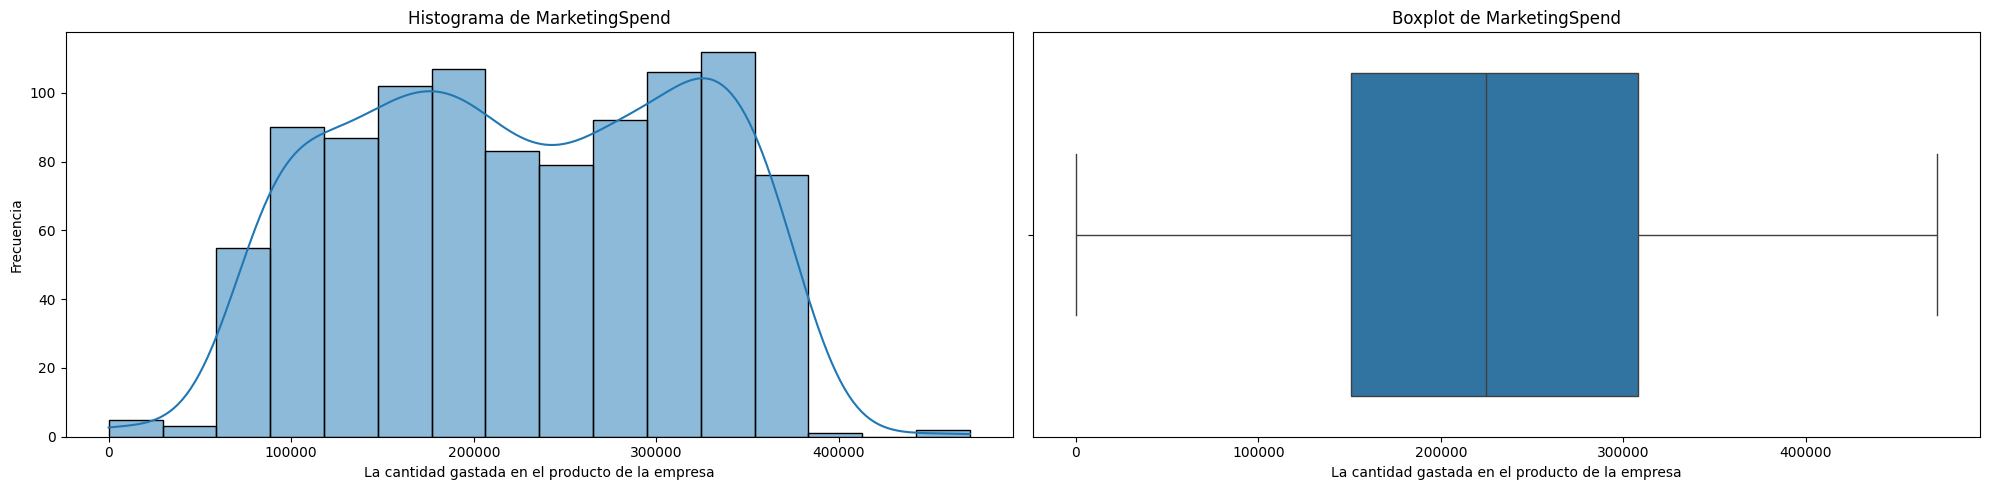

count      1000.000000
mean     226205.058419
std       91578.393542
min           0.000000
25%      150969.584600
50%      224517.887350
75%      308189.808525
max      471784.100000
Name: MarketingSpend, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['MarketingSpend'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de MarketingSpend')
axs[0].set_xlabel('La cantidad gastada en el producto de la empresa')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=companies['MarketingSpend'], ax=axs[1])
axs[1].set_title('Boxplot de MarketingSpend')
axs[1].set_xlabel('La cantidad gastada en el producto de la empresa')

plt.tight_layout()
plt.show()

companies['MarketingSpend'].describe()


**Histograma:**

El histograma muestra la distribución de la cantidad gastada en el producto de la empresa. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada en el producto de la empresa se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la cantidad gastada en el producto de la empresa Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). No se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la cantidad gastada en el producto de la empresa no presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la cantidad gastada en el producto de la empresa en los datos presenta una tendencia central, con la mayoría de la cantidad gastada en el producto de la empresa concentrándose alrededor de 224517.89. La ausencia de valores atípicos indica que los datos no presentan extremos significativos en cuanto a la cantidad gastada en el producto de la empresa La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Profit

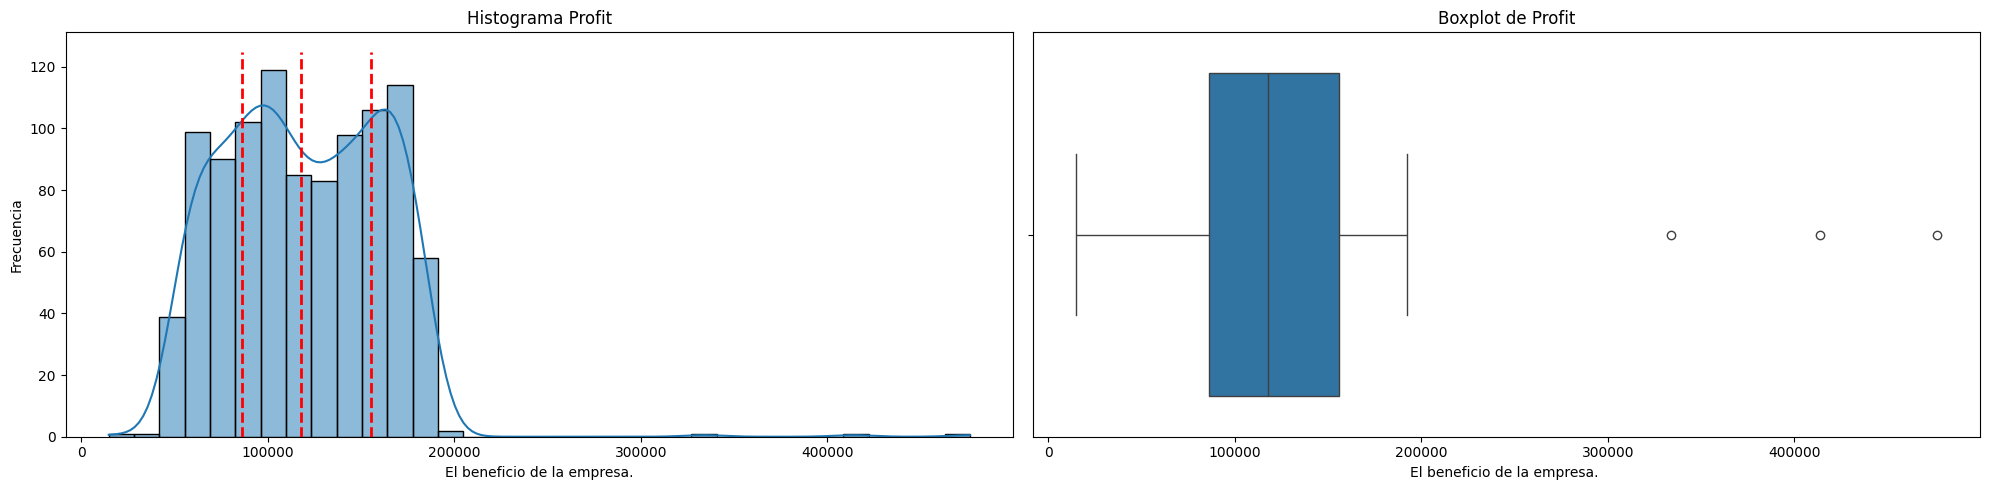

count      1000.000000
mean     119546.164656
std       42888.633848
min       14681.400000
25%       85943.198543
50%      117641.466300
75%      155577.107425
max      476485.430000
Name: Profit, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(companies['Profit'], kde=True, ax=axs[0])

# Calcular cuartiles
q1 = companies['Profit'].quantile(0.25)
q2 = companies['Profit'].quantile(0.5)
q3 = companies['Profit'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

axs[0].set_title('Histograma Profit')
axs[0].set_xlabel('El beneficio de la empresa.')
axs[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=companies['Profit'], ax=axs[1])
axs[1].set_title('Boxplot de Profit')
axs[1].set_xlabel('El beneficio de la empresa. ')

plt.tight_layout()
plt.show()

companies['Profit'].describe()



**Histograma:**

El histograma muestra la distribución de la velocidad de el beneficio de la empresa en los datos meteorológicos. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de el beneficio de la empresa se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de el beneficio de la empresa. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos días con niveles de el beneficio de la empresa significativamente altos.

**Interpretación:**

En general, la distribución de el beneficio de la empresa en los datos presenta una tendencia central, con la mayoría de el beneficio de la empresa concentrándose alrededor de 117641.47. Sin embargo, la presencia de valores atípicos indica que hay algunos días con niveles de el beneficio de la empresa significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


### Conclusiones

#### Columnas
- RyD_Spend: La cantidad gastada en investigación y desarrollo.
- Administration: La cantidad gastada en trabajos administrativos.
- MarketingSpend: La cantidad gastada en el producto de la empresa.
- State: Sucursales que tiene la empresa en Nueva York, California y Florida.
- Profit: El beneficio de la empresa.

#### Outliers

Según nuestro análisis previo, las siguientes columnas presentan valores atípicos: **Profit** y **Administration**. A excepción de **Profit** deberán tratarse todos los valores atípicos encontrados para así evitar que estos puedan sesgar o influir en la estimación de los parámetros del modelo, ya que un solo valor atípico podría arrastrar la línea de regresión hacia sí mismo, lo que resulta en una pendiente y una intersección que no representa correctamente la relación general entre las variables.

Para lograr esto deberemos tener en cuenta que los datos eliminados nunca deberán ser superiores al 10% de los datos totales, ya que si no, podríamos perder información valiosa que podría ser crucial para nuestro análisis. Además, una eliminación excesiva de datos podría llevar a un sesgo en los resultados del modelo. Por lo tanto, es esencial equilibrar la necesidad de limpiar los datos y preservar la integridad de nuestro conjunto de datos.

Sin embargo, cabe aclarar que estos valores atípicos podrían ser un error de Tipo I al rechazar incorrectamente la hipótesis nula de que el punto de datos no es un valor atípico. Por lo tanto, evaluaremos su tratamiento dependiendo de los resultados obtenidos.

## Análisis estadístico descriptivo de PokemonDB

### Visualización de datos

Examinaremos los datos para un primer vistazo.

In [ ]:
PokemonDB

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...
1185,Chi-Yu,Dark,55,80,80,135,120,100
1186,Roaring Moon,Dragon,105,139,71,55,101,119
1187,Iron Valiant,Fairy,74,130,90,120,60,116
1188,Koraidon,Fighting,100,135,115,85,100,135


A continuación, examinaremos qué tipos de variables son las columnas.

In [ ]:
PokemonDB.dtypes

Name       object
Type       object
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object

Investiguemos la presencia de valores nulos en los datos.

In [ ]:
companies.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

Vemos si hay valores duplicados

In [ ]:
PokemonDB[PokemonDB.duplicated(keep=False)]

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
95,Geodude,Rock,40,80,100,30,30,20
96,Geodude,Rock,40,80,100,30,30,20
97,Graveler,Rock,55,95,115,45,45,35
98,Graveler,Rock,55,95,115,45,45,35
99,Golem,Rock,80,120,130,55,65,45
100,Golem,Rock,80,120,130,55,65,45
118,Grimer,Poison,80,80,50,40,50,25
119,Grimer,Poison,80,80,50,40,50,25
120,Muk,Poison,105,105,75,65,100,50
121,Muk,Poison,105,105,75,65,100,50


Vemos que hay valores duplicados, estos los eliminaremos posteriormente.

Para concluir nuestra primera inspección, veremos las estadísticas descriptivas del conjunto de datos.

In [ ]:
PokemonDB.describe(include='all')

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190,1190,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
unique,1008,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Rotom,Water,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,149,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,NaN,NaN,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,NaN,NaN,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,NaN,NaN,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,NaN,NaN,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000


### Gráficos

#### Type

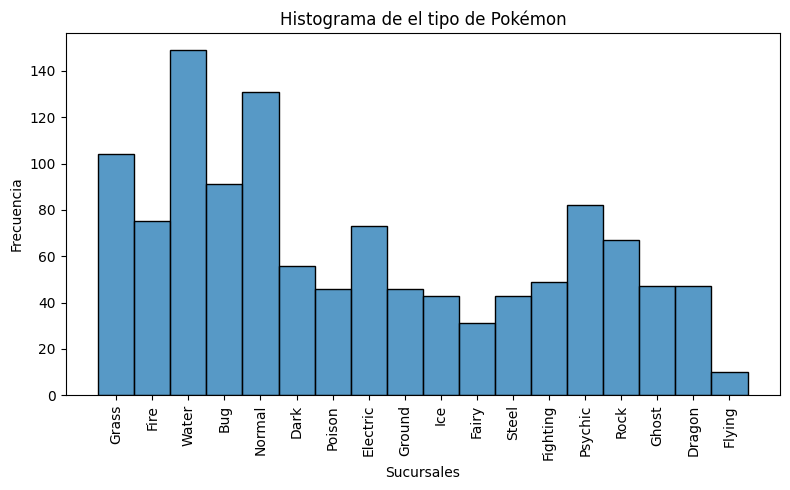

count      1190
unique       18
top       Water
freq        149
Name: Type, dtype: object

In [ ]:
fig, axs = plt.subplots(figsize=(8, 5))

# Histograma
sns.histplot(PokemonDB['Type'])
axs.set_title('Histograma de el tipo de Pokémon')
axs.set_xlabel('Sucursales')
axs.set_ylabel('Frecuencia')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

PokemonDB['Type'].describe()


**Histograma:**

El histograma muestra la distribución de los el tipo de Pokémon. Cada barra en el histograma representa la frecuencia de el tipo de Pokémon específica dentro del conjunto de datos.

**Interpretación:**

Se observa que la frecuencia varía entre los diferentes el tipo de Pokémon, lo que indica que algunos tipos de Pokémon tienen más observaciones que otras en el conjunto de datos.

#### HP

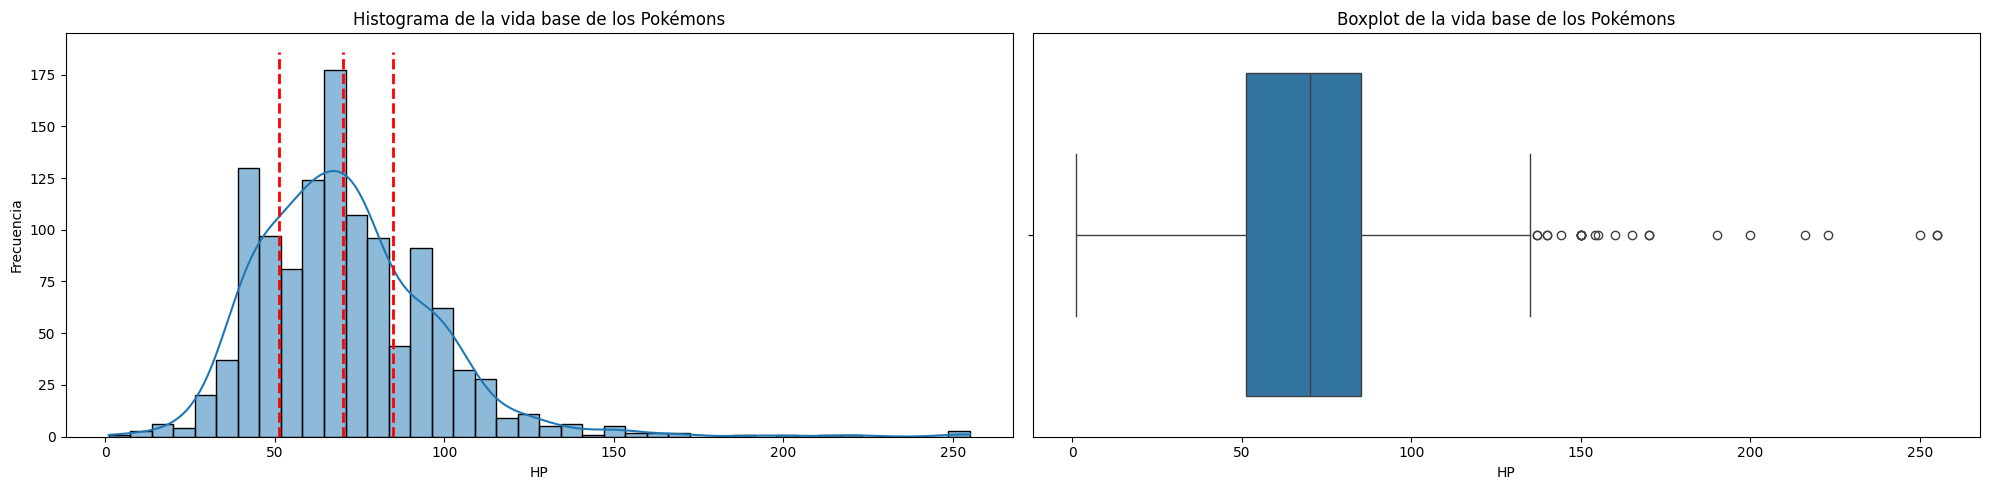

count    1190.000000
mean       70.852941
std        26.886443
min         1.000000
25%        51.250000
50%        70.000000
75%        85.000000
max       255.000000
Name: HP, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['HP'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la vida base de los Pokémons')
axs[0].set_xlabel('HP')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['HP'].quantile(0.25)
q2 = PokemonDB['HP'].quantile(0.5)
q3 = PokemonDB['HP'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['HP'], ax=axs[1])
axs[1].set_title('Boxplot de la vida base de los Pokémons')
axs[1].set_xlabel('HP')

plt.tight_layout()
plt.show()

PokemonDB['HP'].describe()

**Histograma:**

El histograma muestra la distribución de la vida base de los Pokémons. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la vida base de los Pokémons se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la vida base de los Pokémons. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos que valores de la vida base de los Pokémons significativamente altos.


**Interpretación:**

En general, la distribución de la vida base de los Pokémons presenta una tendencia central, con la mayoría de las vidas base de los Pokémons concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de vida base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


#### Attack

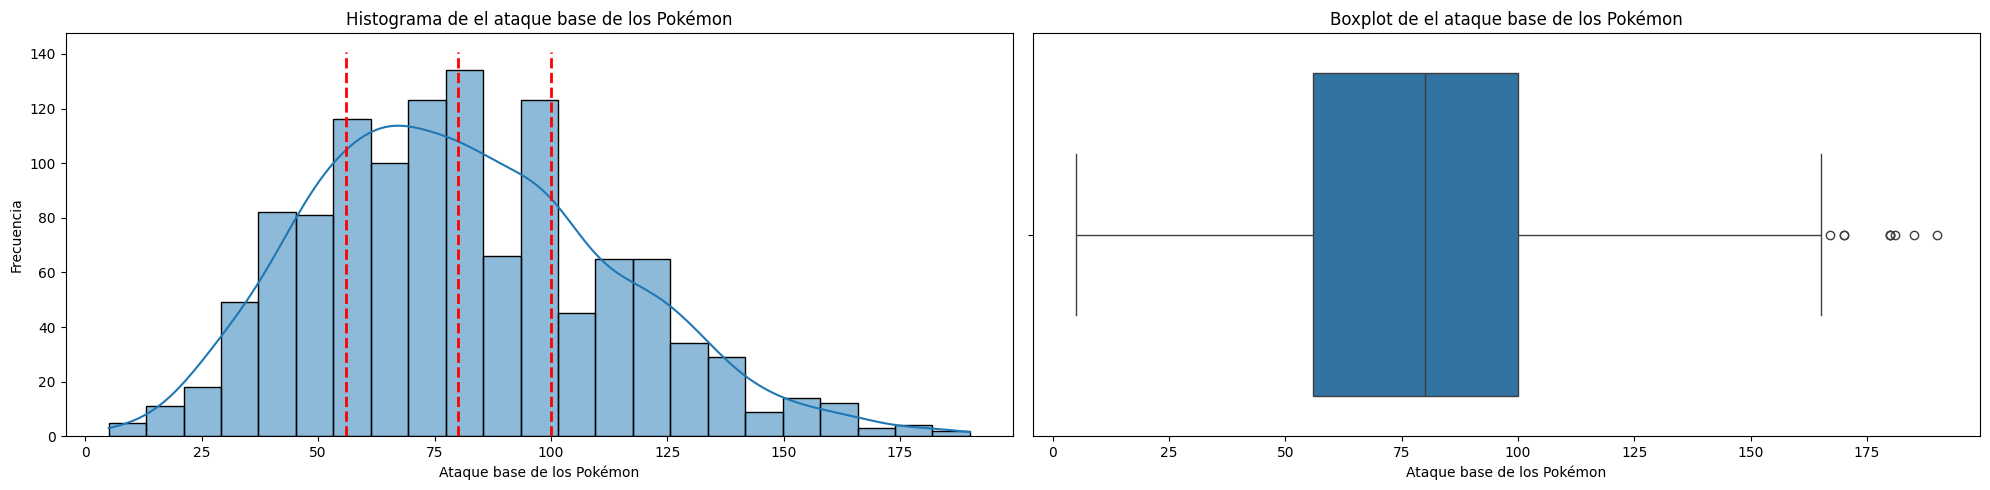

count    1190.000000
mean       80.957983
std        32.119650
min         5.000000
25%        56.000000
50%        80.000000
75%       100.000000
max       190.000000
Name: Attack, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Attack'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de el ataque base de los Pokémon')
axs[0].set_xlabel('Ataque base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Attack'].quantile(0.25)
q2 = PokemonDB['Attack'].quantile(0.5)
q3 = PokemonDB['Attack'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Attack'], ax=axs[1])
axs[1].set_title('Boxplot de el ataque base de los Pokémon')
axs[1].set_xlabel('Ataque base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Attack'].describe()

**Histograma:**

El histograma muestra la distribución de el ataque base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de el ataque base de los Pokémon se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de el ataque base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos (outliers) que se extiendan más allá de los bigotes del boxplot. Esto sugiere que hay algunos valores de el ataque base de los Pokémon significativamente altos.

**Interpretación:**

En general, la distribución de el ataque base de los Pokémon presenta una tendencia central, con la mayoría de el ataque base de los Pokémon concentrándose alrededor de 80. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de ataque base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.



#### Defense

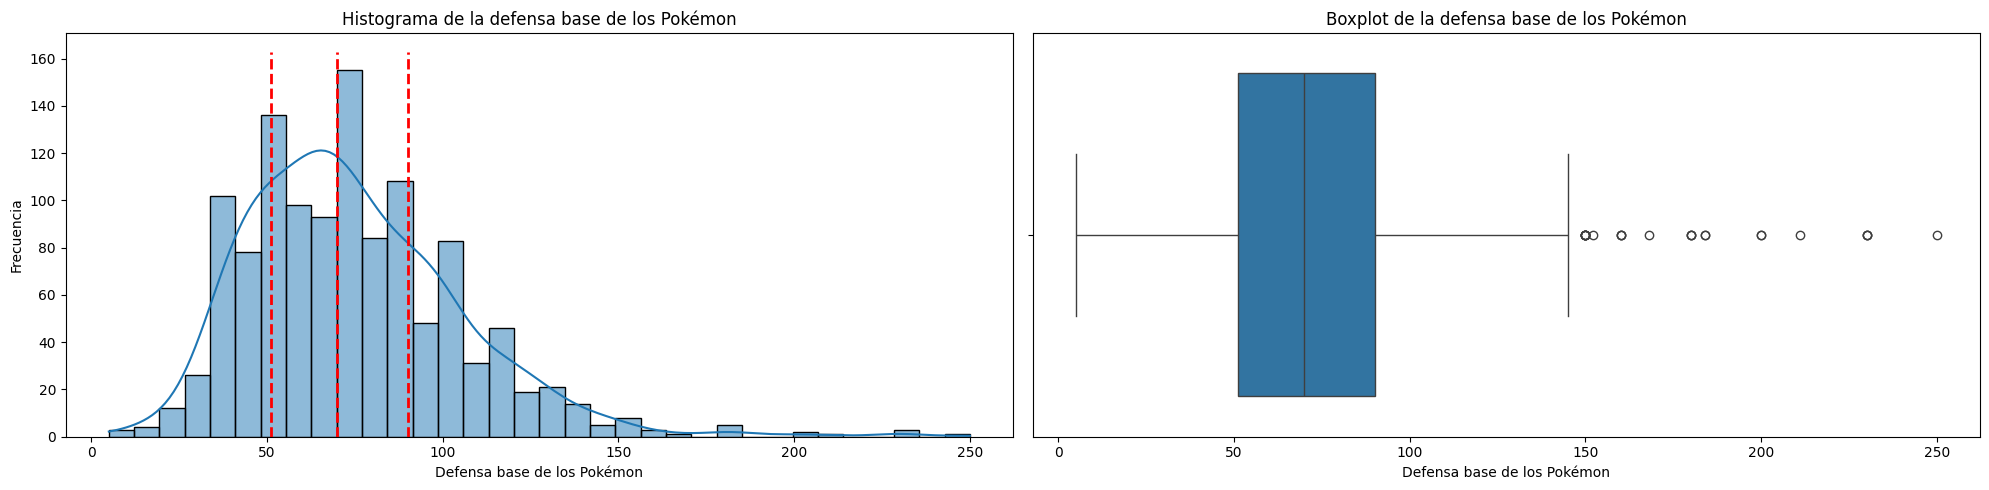

count    1190.000000
mean       74.586555
std        30.718212
min         5.000000
25%        51.000000
50%        70.000000
75%        90.000000
max       250.000000
Name: Defense, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Defense'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la defensa base de los Pokémon')
axs[0].set_xlabel('Defensa base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Defense'].quantile(0.25)
q2 = PokemonDB['Defense'].quantile(0.5)
q3 = PokemonDB['Defense'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Defense'], ax=axs[1])
axs[1].set_title('Boxplot de la defensa base de los Pokémon')
axs[1].set_xlabel('Defensa base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Defense'].describe()

**Histograma:**

El histograma muestra la distribución de la defensa base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la defensa base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de la defensa base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la defensa base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la defensa base de los Pokémon presenta una tendencia central, con la mayoría de las defensas bases de los Pokémones concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles de el defensa base significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Sp. Def

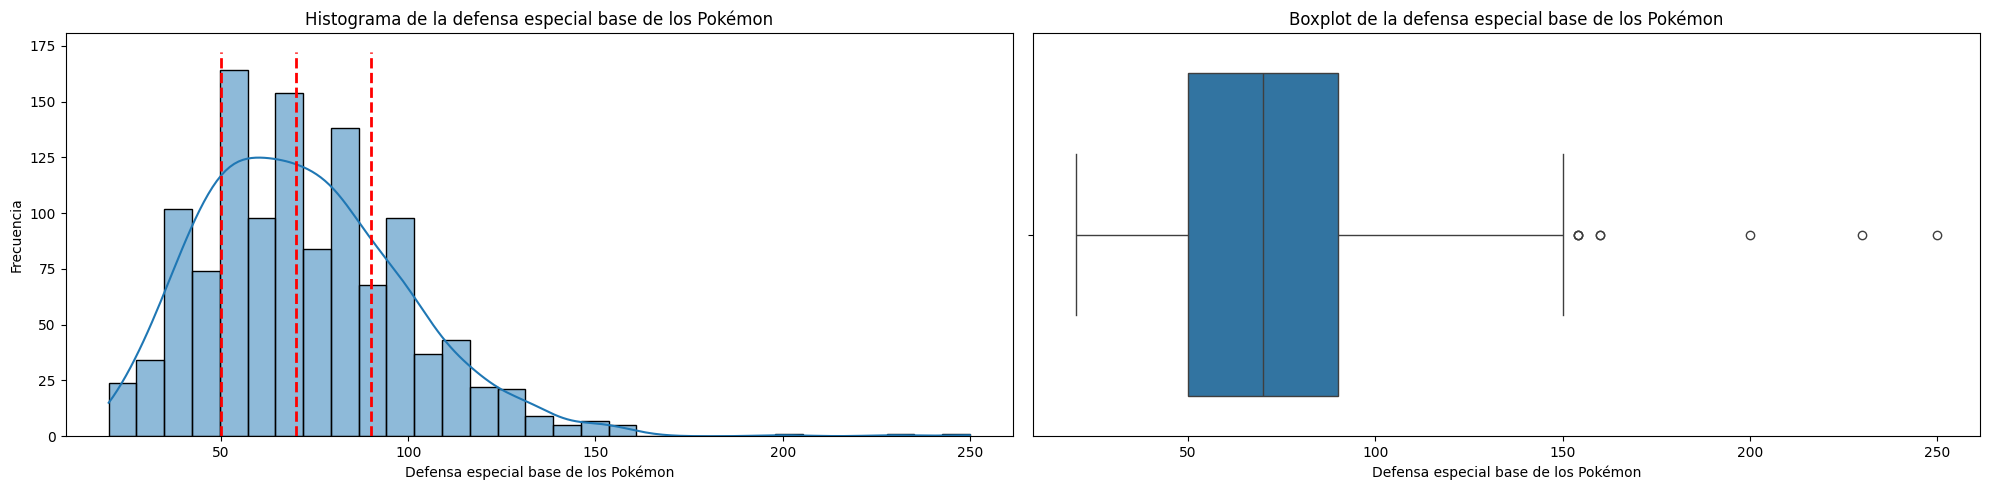

count    1190.000000
mean       72.050420
std        27.637522
min        20.000000
25%        50.000000
50%        70.000000
75%        90.000000
max       250.000000
Name: Sp. Def, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Sp. Def'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la defensa especial base de los Pokémon')
axs[0].set_xlabel('Defensa especial base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Sp. Def'].quantile(0.25)
q2 = PokemonDB['Sp. Def'].quantile(0.5)
q3 = PokemonDB['Sp. Def'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Sp. Def'], ax=axs[1])
axs[1].set_title('Boxplot de la defensa especial base de los Pokémon')
axs[1].set_xlabel('Defensa especial base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Sp. Def'].describe()

**Histograma:**

El histograma muestra la distribución de la defensa especial base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la defensa especial base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de la defensa especial base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la defensa especial base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la defensa especial base de los Pokémon presenta una tendencia central, con la mayoría de la defensa especial base de los Pokémon concentrándose alrededor de 70. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles defensa especial significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Speed

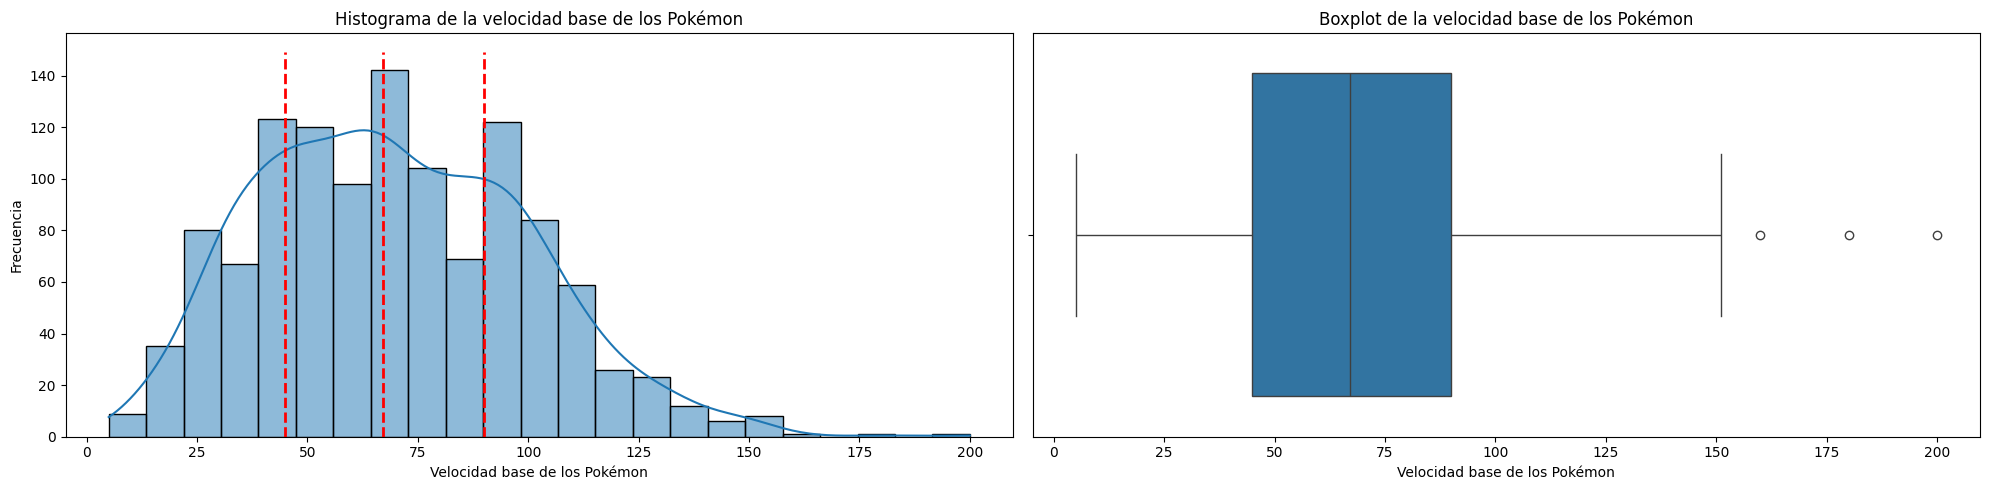

count    1190.000000
mean       69.695798
std        30.204376
min         5.000000
25%        45.000000
50%        67.000000
75%        90.000000
max       200.000000
Name: Speed, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Speed'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de la velocidad base de los Pokémon')
axs[0].set_xlabel('Velocidad base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Speed'].quantile(0.25)
q2 = PokemonDB['Speed'].quantile(0.5)
q3 = PokemonDB['Speed'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Speed'], ax=axs[1])
axs[1].set_title('Boxplot de la velocidad base de los Pokémon')
axs[1].set_xlabel('Velocidad base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Speed'].describe()

**Histograma:**

El histograma muestra la distribución de la velocidad base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de la cantidad gastada de la velocidad base de los Pokémon se concentran cerca de un rango especifico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.


**Boxplot:**

El boxplot proporciona un resumen estadístico de la velocidad base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan valores atípicos que se extiendan más allá de los bigotes del boxplot. Esto sugiere que los datos de la velocidad base de los Pokémon presentan valores extremos significativos.


**Interpretación:**

En general, la distribución de la velocidad base de los Pokémon en los datos presenta una tendencia central, con la mayoría de la velocidad base de los Pokémon concentrándose alrededor de 67. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles velocidad significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.

#### Sp. Atk

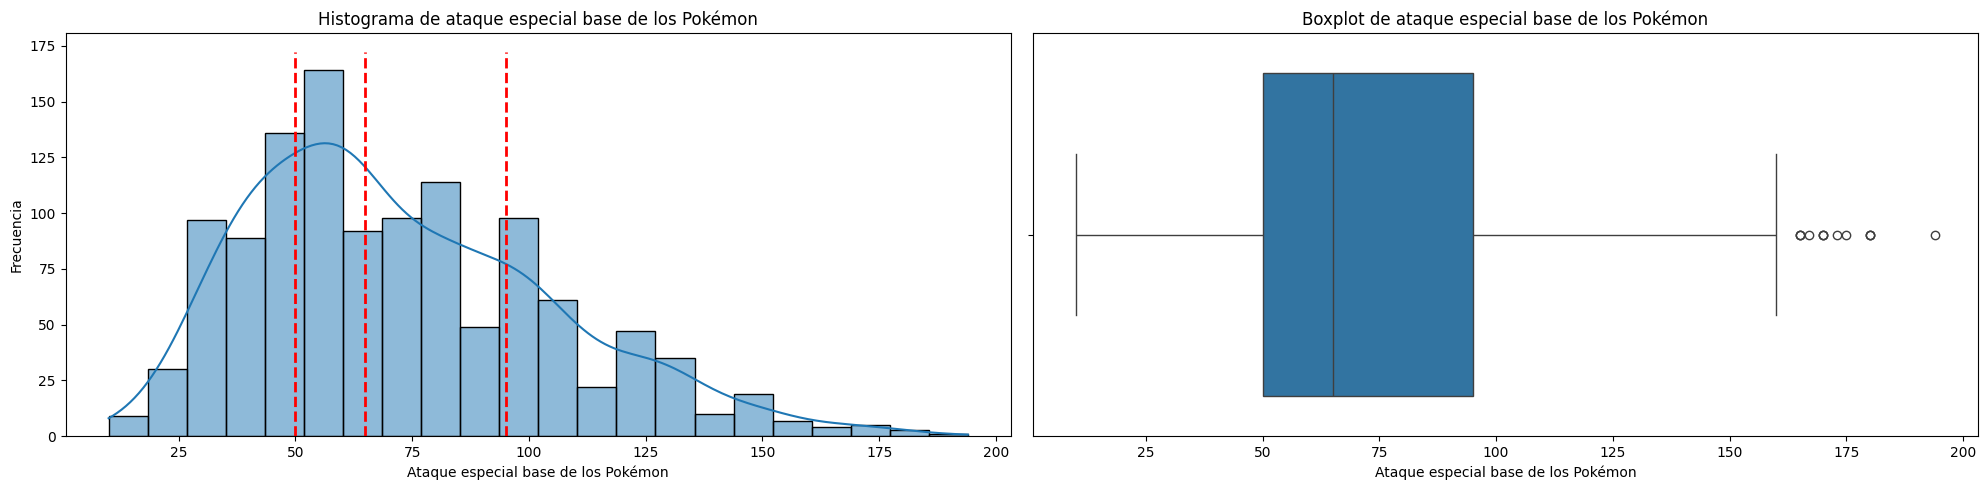

count    1190.000000
mean       72.756303
std        32.658636
min        10.000000
25%        50.000000
50%        65.000000
75%        95.000000
max       194.000000
Name: Sp. Atk, dtype: float64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Histograma
sns.histplot(PokemonDB['Sp. Atk'], kde=True, ax=axs[0])
axs[0].set_title('Histograma de ataque especial base de los Pokémon')
axs[0].set_xlabel('Ataque especial base de los Pokémon')
axs[0].set_ylabel('Frecuencia')

# Calcular cuartiles
q1 = PokemonDB['Sp. Atk'].quantile(0.25)
q2 = PokemonDB['Sp. Atk'].quantile(0.5)
q3 = PokemonDB['Sp. Atk'].quantile(0.75)

# Agregue líneas de cuartil con ymin e ymax establecidos en todo el rango y del gráfico
axs[0].vlines([q1, q2, q3], color='red', linestyles='dashed', linewidths=2,
              ymin=axs[0].get_ylim()[0], ymax=axs[0].get_ylim()[1])

# Boxplot
sns.boxplot(x=PokemonDB['Sp. Atk'], ax=axs[1])
axs[1].set_title('Boxplot de ataque especial base de los Pokémon')
axs[1].set_xlabel('Ataque especial base de los Pokémon')

plt.tight_layout()
plt.show()

PokemonDB['Sp. Atk'].describe()

**Histograma:**

El histograma muestra la distribución de ataque especial base de los Pokémon. La curva KDE (Kernel Density Estimate) superpuesta al histograma representa una estimación suavizada de esta distribución. Se observa que la mayoría de ataque especial base de los Pokémon se concentran alrededor de un rango específico, lo que indica una distribución con una tendencia central. Las líneas verticales rojas representan los cuartiles (Q1, Q2, Q3) de los datos.

**Boxplot:**

El boxplot proporciona un resumen estadístico de los datos de ataque especial base de los Pokémon. Muestra la mediana (representada por la línea horizontal dentro del recuadro), los cuartiles (Q1 y Q3, representados por los límites del recuadro) y el rango intercuartílico (IQR). Se observan varios valores atípicos que se extienden más allá de los bigotes del boxplot. Esto sugiere que hay algunos Pokémon con niveles de ataque especial base significativamente altos.

**Interpretación:**

En general, la distribución de ataque especial base de los Pokémon presenta una tendencia central, con la mayoría de ataque especial base de los Pokémon concentrándose alrededor de 65. Sin embargo, la presencia de valores atípicos indica que hay algunos Pokémons con niveles ataque especial significativamente altos. La media y la mediana son cercanas, lo que sugiere que la distribución puede ser simétrica.


### Conclusiones

#### Columnas
- *Name*: El nombre en inglés del Pokémon
- *Type*: El tipo de Pokémon
- *HP*: El HP base del Pokémon
- *Attack*: El ataque especial base de los Pokémon
- *Defense*: La Defensa Base de los Pokémon
- *Sp. Attack*: El Ataque Base de los Pokémon
- *Sp. Defense*: La defensa especial base de los Pokémon
- *Speed*: La velocidad base del Pokémon


#### Outliers

Según nuestro análisis previo, las siguientes columnas presentan valores atípicos: HP, Attack, Defense, Sp. Attack, Sp. Defense y Speed. Deberán tratarse todos los valores atípicos encontrados para así evitar que estos puedan sesgar o influir en la estimación de los parámetros del modelo, ya que un solo valor atípico podría arrastrar la línea de regresión hacia sí mismo, lo que resulta en una pendiente y una intersección que no representa correctamente la relación general entre las variables.

Para lograr esto deberemos tener en cuenta que los datos eliminados nunca deberán ser superiores al 10% de los datos totales, ya que si no,podríamos perder información valiosa que podría ser crucial para nuestro análisis. Además, una eliminación excesiva de datos podría llevar a un sesgo en los resultados del modelo. Por lo tanto, es esencial equilibrar la necesidad de limpiar los datos y preservar la integridad de nuestro conjunto de datos.

Sin embargo, cabe aclarar que estos valores atípicos podrían ser un error de Tipo I al rechazar incorrectamente la hipótesis nula de que el punto de datos no es un valor atípico. Por lo tanto, evaluaremos su tratamiento dependiendo de los resultados obtenidos.

# Reducción de dimensionalidad

In [ ]:
PokemonDB = PokemonDB.drop('Name', axis=1)

PokemonDB

,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...
1185,Dark,55,80,80,135,120,100
1186,Dragon,105,139,71,55,101,119
1187,Fairy,74,130,90,120,60,116
1188,Fighting,100,135,115,85,100,135


# Eliminación de duplicados

## Eliminación de duplicados de Companies

In [ ]:
# Eliminar filas duplicadas
companies = companies.drop_duplicates()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(companies)

# Verificar la forma del DataFrame después de eliminar duplicados
print("Número de filas después de eliminar duplicados:", companies.shape[0])

Filas duplicadas:
     RyD_Spend  Administration  MarketingSpend       State        Profit
0    165349.20      136897.800     471784.1000    New York  192261.83000
1    162597.70      151377.590     443898.5300  California  191792.06000
2    153441.51      101145.550     407934.5400     Florida  191050.39000
3    144372.41      118671.850     383199.6200    New York  182901.99000
4    142107.34       91391.770     366168.4200     Florida  166187.94000
..         ...             ...             ...         ...           ...
995   54135.00      118451.999     173232.6695  California   95279.96251
996  134970.00      130390.080     329204.0228  California  164336.60550
997  100275.47      241926.310     227142.8200  California  413956.48000
998  128456.23      321652.140     281692.3200  California  333962.19000
999  161181.72      270939.860     295442.1700    New York  476485.43000

[999 rows x 5 columns]
Número de filas después de eliminar duplicados: 999


## Eliminación de duplicados de PokemonDB

In [ ]:
# Para obtener las filas duplicadas
duplicated_rows = PokemonDB[PokemonDB.duplicated(keep=False)]

print(duplicated_rows)

        Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
4       Fire   39      52       43       60       50     65
5       Fire   58      64       58       80       65     80
6       Fire   78      84       78      109       85    100
95      Rock   40      80      100       30       30     20
96      Rock   40      80      100       30       30     20
...      ...  ...     ...      ...      ...      ...    ...
1107  Normal   82      96       51       45       51     92
1108  Normal   82      96       51       45       51     92
1109  Normal   82      96       51       45       51     92
1161  Normal  125     100       80       85       75     55
1162  Normal  125     100       80       85       75     55

[61 rows x 7 columns]


In [ ]:
# Eliminar filas duplicadas
pokemon = PokemonDB.drop_duplicates()

# Mostrar filas duplicadas
print("Filas duplicadas:")
print(pokemon)

# Verificar la forma del DataFrame después de eliminar duplicados
print("Número de filas antes de eliminar duplicados:", PokemonDB.shape[0])
print("Número de filas después de eliminar duplicados:", pokemon.shape[0])

Filas duplicadas:
          Type   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0        Grass   45      49       49       65       65     45
1        Grass   60      62       63       80       80     60
2        Grass   80      82       83      100      100     80
3        Grass   80     100      123      122      120     80
4         Fire   39      52       43       60       50     65
...        ...  ...     ...      ...      ...      ...    ...
1185      Dark   55      80       80      135      120    100
1186    Dragon  105     139       71       55      101    119
1187     Fairy   74     130       90      120       60    116
1188  Fighting  100     135      115       85      100    135
1189  Electric  100      85      100      135      115    135

[1155 rows x 7 columns]
Número de filas antes de eliminar duplicados: 1190
Número de filas después de eliminar duplicados: 1155


In [ ]:
pokemon

,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Grass,45,49,49,65,65,45
1,Grass,60,62,63,80,80,60
2,Grass,80,82,83,100,100,80
3,Grass,80,100,123,122,120,80
4,Fire,39,52,43,60,50,65
...,...,...,...,...,...,...,...
1185,Dark,55,80,80,135,120,100
1186,Dragon,105,139,71,55,101,119
1187,Fairy,74,130,90,120,60,116
1188,Fighting,100,135,115,85,100,135


# One hot enconding (Dummies - Companies)

In [ ]:
# Codificar las variables categóricas
dummies = pd.get_dummies(companies['State']).astype('int64')
companies = pd.concat([companies, dummies], axis=1)
companies

,RyD_Spend,Administration,MarketingSpend,State,Profit,California,Florida,New York
0,165349.20,136897.800,471784.1000,New York,192261.83000,0,0,1
1,162597.70,151377.590,443898.5300,California,191792.06000,1,0,0
2,153441.51,101145.550,407934.5400,Florida,191050.39000,0,1,0
3,144372.41,118671.850,383199.6200,New York,182901.99000,0,0,1
4,142107.34,91391.770,366168.4200,Florida,166187.94000,0,1,0
...,...,...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251,1,0,0
996,134970.00,130390.080,329204.0228,California,164336.60550,1,0,0
997,100275.47,241926.310,227142.8200,California,413956.48000,1,0,0
998,128456.23,321652.140,281692.3200,California,333962.19000,1,0,0


In [ ]:
companies = companies.drop(['New York', 'State'], axis=1)
companies

,RyD_Spend,Administration,MarketingSpend,Profit,California,Florida
0,165349.20,136897.800,471784.1000,192261.83000,0,0
1,162597.70,151377.590,443898.5300,191792.06000,1,0
2,153441.51,101145.550,407934.5400,191050.39000,0,1
3,144372.41,118671.850,383199.6200,182901.99000,0,0
4,142107.34,91391.770,366168.4200,166187.94000,0,1
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,1,0
996,134970.00,130390.080,329204.0228,164336.60550,1,0
997,100275.47,241926.310,227142.8200,413956.48000,1,0
998,128456.23,321652.140,281692.3200,333962.19000,1,0


# Estandarización

Solo estandarizamos los valores de Comapies, ya que consideramos que los valores de Pokémon ya se encuentran en el mismo rango.
  
Estandarizamos las variables continuas porque:

- Mejora la convergencia de muchos algoritmos de aprendizaje automático.
- Hace que los coeficientes de los modelos sean más interpretables.
- Evita que variables con grandes magnitudes dominen sobre otras.

In [ ]:
# Crear el estandarizador
scaler = StandardScaler()

In [ ]:
# Seleccionar las columnas a estandarizar
columns_to_scale = ['Administration', 'MarketingSpend', 'RyD_Spend']

# Aplicar la estandarización a las columnas seleccionadas
companies[columns_to_scale] = scaler.fit_transform(companies[columns_to_scale])
companies

,RyD_Spend,Administration,MarketingSpend,Profit,California,Florida
0,1.798188,1.104642,2.681694,192261.83000,0,0
1,1.739064,2.252563,2.377194,191792.06000,1,0
2,1.542315,-1.729705,1.984480,191050.39000,0,1
3,1.347438,-0.340264,1.714384,182901.99000,0,0
4,1.298766,-2.502960,1.528410,166187.94000,0,1
...,...,...,...,...,...,...
995,-0.591589,-0.357694,-0.578377,95279.96251,1,0
996,1.145398,0.588727,1.124772,164336.60550,1,0
997,0.399880,9.431035,0.010302,413956.48000,1,0
998,1.005430,15.751495,0.605962,333962.19000,1,0


# División del conjunto de datos

##  Companies

In [ ]:
y_companies = companies['Profit']
x_companies = companies.drop('Profit', axis=1)

label_encoder = LabelEncoder()
y_encoded_c = label_encoder.fit_transform(y_companies)

In [ ]:
x_train_companies, x_test_companies, y_train_companies, y_test_companies = train_test_split(x_companies, y_encoded_c, test_size=0.3)

## Pokémons

In [ ]:
y_pokemon = pokemon['Type']
x_pokemon = pokemon.drop('Type', axis=1)

label_encoder = LabelEncoder()
y_encoded_p = label_encoder.fit_transform(y_pokemon)

In [ ]:
x_train_pokemon, x_test_pokemon, y_train_pokemon, y_test_pokemon = train_test_split(x_pokemon, y_encoded_p, test_size=0.3)

# Decision tree (Regression) de Companies

Generamos una lista de nombres de características extrayendo los nombres de columna del DataFrame 'x_train_companies' para usarlos luego.

In [ ]:
feature_list = list(x_train_companies.columns)

## Aplicación de la técnica

In [ ]:
# Crear un objeto DecisionTreeRegressor con los siguientes parámetros:
# - max_depth: profundidad máxima del árbol (6 niveles)
# - min_samples_leaf: número mínimo de muestras requeridas en un nodo hoja (1 muestra)
# - min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno (2 muestras)
clf_rtree = tree.DecisionTreeRegressor(max_depth=6, min_samples_leaf=1, min_samples_split=2)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_tree = clf_rtree.fit(x_train_companies, y_train_companies)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_rtree = clf_rtree.predict(x_test_companies)

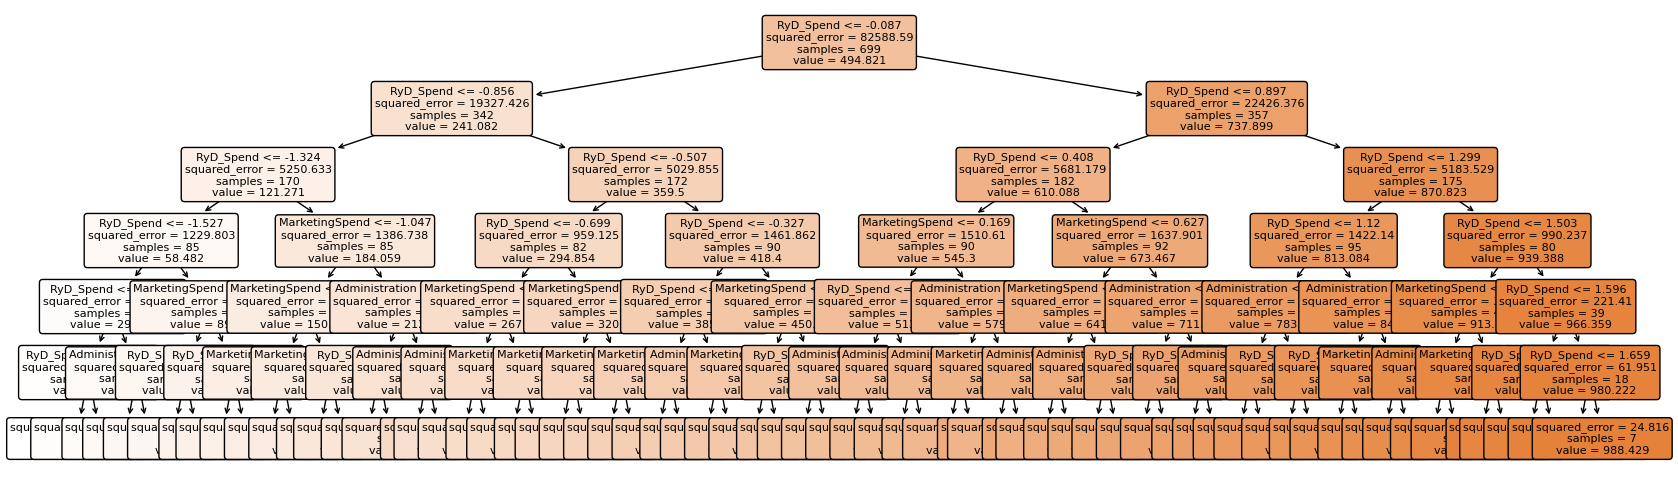

In [ ]:
# Establecer las características como la lista de nombres de características
features = feature_list

# Crear una figura de matplotlib con un tamaño específico para visualizar el árbol de regresión
plt.figure(figsize=(20,6))

# Dibujar el árbol de regresión utilizando la función plot_tree() del módulo tree de scikit-learn
tree.plot_tree(regressor_tree,
               feature_names=features,  # Nombres de las características
               fontsize=8,              # Tamaño de la fuente para los nodos del árbol
               filled=True,            # Rellenar los nodos con colores según la clase mayoritaria
               rounded=True)           # Redondear los nodos del árbol

# Mostrar el árbol de regresión
plt.show()

# Optimización de hiperparámetros Companie

In [ ]:
# Definir una cuadrícula de hiperparámetros para buscar las mejores combinaciones
param_grid = {
    'max_depth': [None, 5, 10, 15],         # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],         # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]            # Número mínimo de muestras requeridas en un nodo hoja
}

# Crear un objeto GridSearchCV para buscar los mejores hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(clf_rtree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Ajustar el objeto GridSearchCV a los datos de entrenamiento
grid_search.fit(x_train_companies, y_train_companies)

# Obtener los mejores hiperparámetros encontrados por GridSearchCV
best_params_rtree = grid_search.best_params_
print("Mejores hiperparámetros:", best_params_rtree)

# Obtener el mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Realizar predicciones utilizando el mejor modelo encontrado
y_pred = best_model.predict(x_test_companies)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test_companies, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio (MSE) en el conjunto de prueba: 1033.3566666666666


**Mejores Hiperparámetros**

**Hiperparámetro max_depth: None**

- Esto indica que el modelo de árbol de decisión no tiene restricción en la profundidad máxima del árbol. No limitar la profundidad puede llevar a un modelo muy complejo, que puede ser propenso al sobreajuste si no se controla adecuadamente.


**Hiperparámetro min_samples_leaf: 1**

- Especifica el número mínimo de muestras requeridas para estar en un nodo hoja del árbol. Un valor de 1 significa que incluso un solo ejemplo puede formar un nodo hoja. Esto permite al modelo capturar una gran cantidad de detalles en los datos, pero nuevamente puede aumentar el riesgo de sobreajuste.

**Hiperparámetro min_samples_split: 2**

- Indica el número mínimo de muestras requeridas para dividir un nodo interno. Un valor de 2 significa que se requieren al menos dos muestras para realizar una división en el árbol. Esto puede evitar divisiones que resulten en regiones con muy pocas muestras, lo que podría ser útil para evitar el sobreajuste.



**Error Cuadrático Medio (MSE): 1033.3566666666666**

- *El MSE es una medida de la calidad de la predicción del modelo, donde valores más bajos indican un mejor ajuste. Un MSE de 1033.36 significa que, en promedio, las predicciones del modelo están desviadas por aproximadamente 1033.36 unidades al cuadrado del valor real.*

# Regression Tree optimización Companies

In [ ]:
# Reajustamos los hiperparámetros a los mejores encontrados.
clf__rtree_ho = tree.DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
regressor_tree_ho = clf__rtree_ho.fit(x_train_companies, y_train_companies)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_rtree_ho = clf__rtree_ho.predict(x_test_companies)

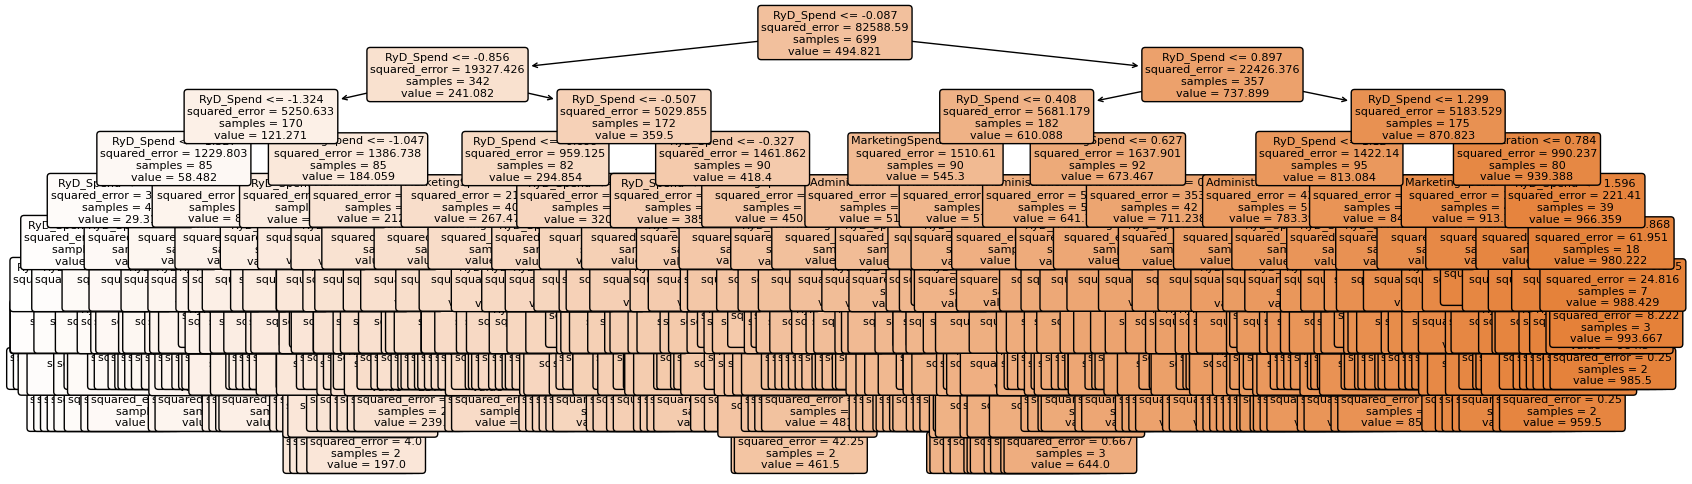

In [ ]:
# Crear una figura de matplotlib con un tamaño específico para visualizar el árbol de regresión
plt.figure(figsize=(20,6))

# Dibujar el árbol de regresión utilizando la función plot_tree() del módulo tree de scikit-learn
tree.plot_tree(regressor_tree_ho,
               feature_names=features,  # Nombres de las características
               fontsize=8,              # Tamaño de la fuente para los nodos del árbol
               filled=True,            # Rellenar los nodos con colores según la clase mayoritaria
               rounded=True)           # Redondear los nodos del árbol

# Mostrar el árbol de regresión
plt.show()

# Metricas de Companies con hiperparámetros optimizados.

In [ ]:
# Convertir y_test_companies a tipo de dato float para asegurar la consistencia del tipo de dato
y_test = y_test_companies.astype(float)

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test_companies, predictions_rtree_ho)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test_companies, predictions_rtree_ho)

# Calcular la Raíz del Error Cuadrático Medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test_companies, predictions_rtree_ho) # medida de la bondad de ajuste del modelo

# Calcular el Error Absoluto Porcentual Medio (MAPE)
mape = np.mean(np.abs((y_test_companies - predictions_rtree_ho) / y_test_companies) * 100)

# Calcular R-squared adjusted (R^2 ajustado)
n = len(y_test_companies)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores

# Imprimir las métricas de evaluación del modelo
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)


Mean Absolute Percentage Error (MAPE): 2.298600518223529
Mean Absolute Error (MAE): 6.9049999999999985
Mean Squared Error (MSE): 1107.6721296296296
Root Mean Squared Error (RMSE): 33.28170863446812
R-squared (R2): 0.9868470224053465
R-squared adjusted (R2 ajustado): 0.9866233323101993



**MAPE: 2.30**
-  El MAPE mide el error en porcentaje. En este caso, el error absoluto medio es aproximadamente 2.30%, lo que significa que, en promedio, las predicciones del modelo están desviadas en un 2.30% de los valores reales. Un MAPE bajo indica un buen rendimiento del modelo.

**MAE: 6.90**
- El MAE mide el error promedio en unidades de la variable de salida. Un MAE de aproximadamente 6.90 sugiere que, en promedio, las predicciones del modelo están desviadas por 6.90 unidades de los valores reales. Este valor es útil para entender el error medio sin considerar la dirección del error (positivo o negativo).


**MSE: 1107.67**
- El MSE mide el error promedio al cuadrado. Un MSE de 1107.67 indica que, en promedio, las desviaciones cuadradas de las predicciones son 1107.67 unidades al cuadrado. Debido a que el MSE penaliza los errores grandes más severamente que el MAE, un MSE alto puede indicar la presencia de errores grandes en las predicciones.


**RMSE: 33.28**
- El RMSE es la raíz cuadrada del MSE y proporciona una medida del error en las mismas unidades que la variable de salida. Un RMSE de aproximadamente 33.28 sugiere que las predicciones del modelo, en promedio, están desviadas por 33.28 unidades de los valores reales. Esto facilita la interpretación en comparación con el MSE.


**R2: 0.987**
- El R2 mide la proporción de la variabilidad en la variable de salida que es explicada por el modelo. Un R2 de 0.987 indica que el modelo explica aproximadamente el 98.7% de la variabilidad de los datos, lo que sugiere un ajuste muy bueno del modelo.


**R2 ajustado: 0.987**
- Interpretación: El R2 ajustado es una versión ajustada del R2 que toma en cuenta el número de predictores en el modelo. Un R2 ajustado de 0.987 sugiere que incluso al considerar el número de predictores, el modelo sigue explicando muy bien la variabilidad de los datos.

- La pequeña diferencia entre el R2 y el R2 ajustado indica que el modelo no está sobreajustado y que los predictores incluidos son relevantes.


**Conclusiones**

*Las métricas R2 y R2 ajustado cercanas a 1 indican que el modelo tiene un excelente ajuste a los datos, explicando casi toda la variabilidad.*


*El MAE y el MAPE son bajos, sugiriendo que, en promedio, los errores absolutos de las predicciones son pequeños y consistentes.*

# Decision tree (Classification) de Pokémon

Generamos una lista de nombres de características extrayendo los nombres de columna del DataFrame 'x_train_pokemon' para usarlos luego.

In [ ]:
feature_list_pokemon = list(x_train_pokemon.columns)

## Aplicación de la técnica

In [ ]:
# Crear un objeto DecisionTreeClassifier con los siguientes parámetros:
# - max_depth: profundidad máxima del árbol (6 niveles)
# - min_samples_leaf: número mínimo de muestras requeridas en un nodo hoja (1 muestra)
# - min_samples_split: número mínimo de muestras requeridas para dividir un nodo interno (2 muestras)
# - random_state: semilla para la aleatoriedad, asegura reproducibilidad de los resultados (13)
clf_ctree = tree.DecisionTreeClassifier()

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
classifier_tree = clf_ctree.fit(x_train_pokemon, y_train_pokemon)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_ctree = clf_ctree.predict(x_test_pokemon)

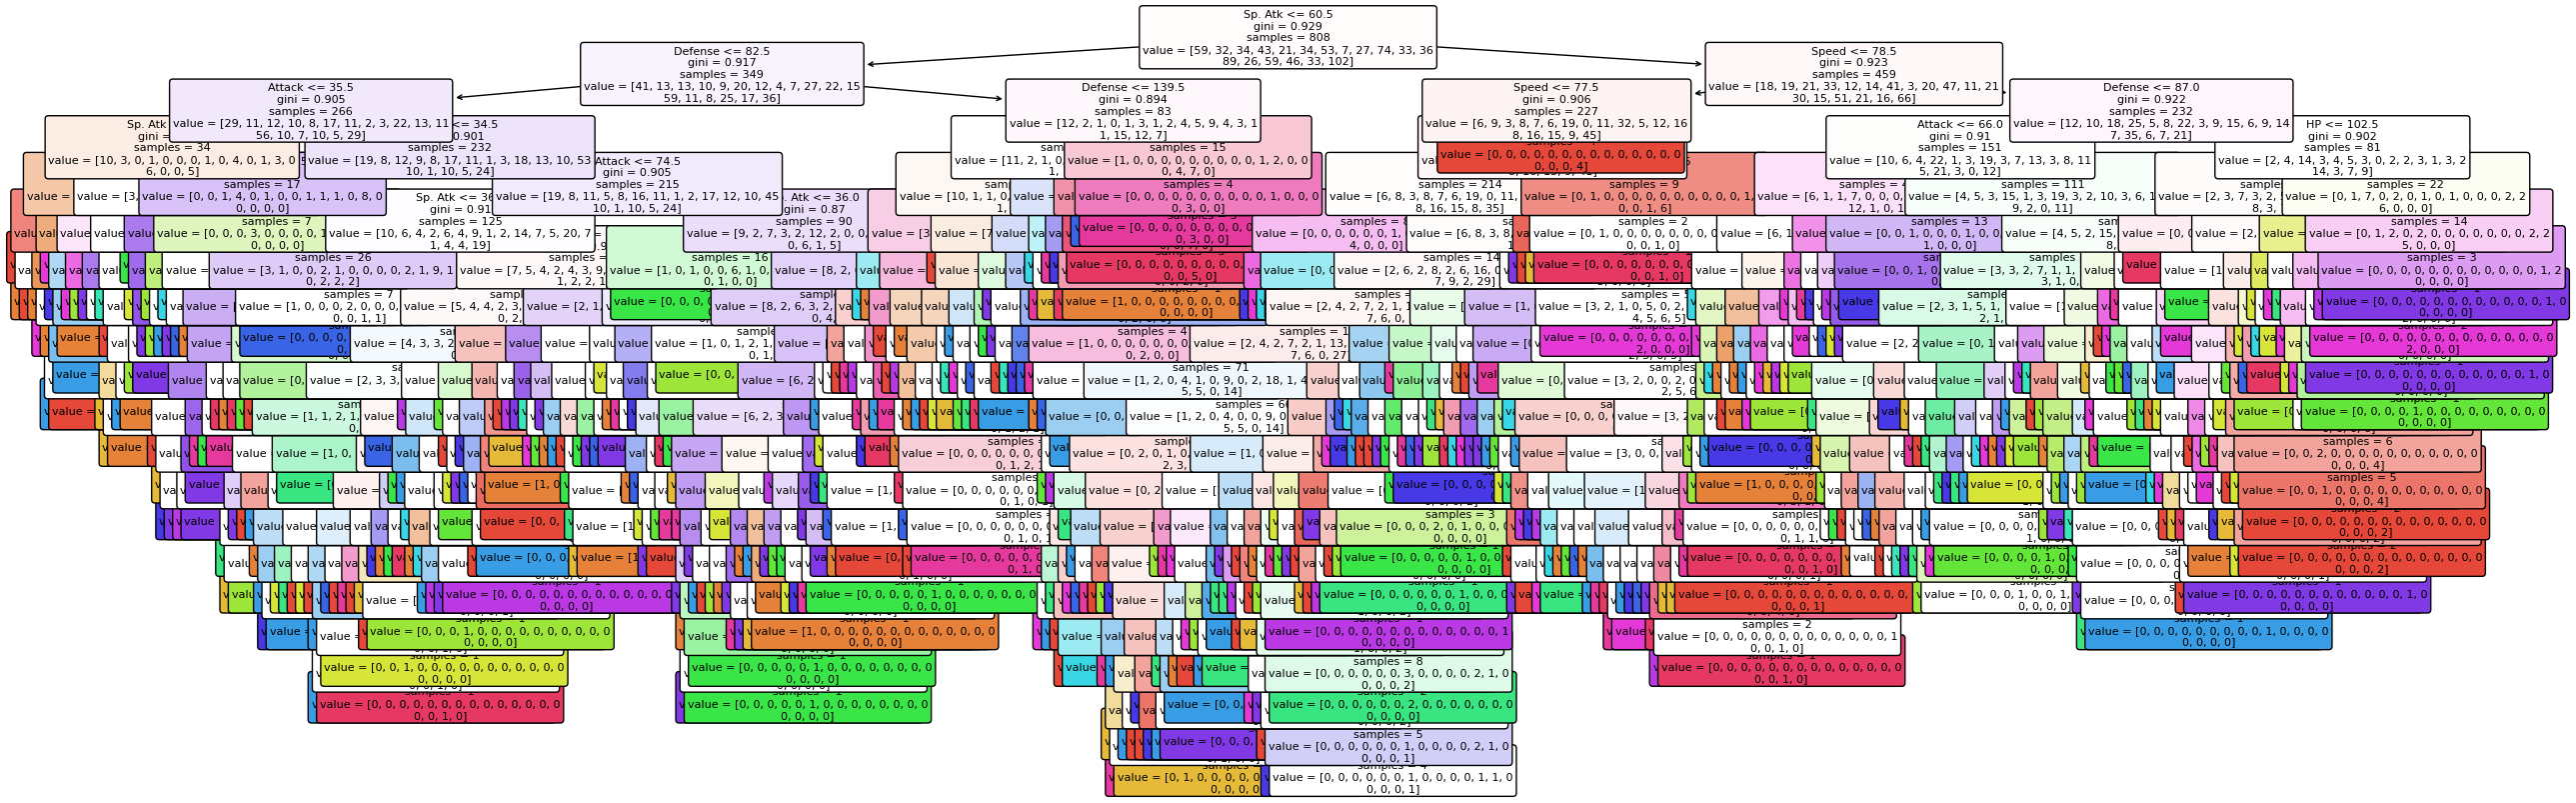

In [ ]:
features = feature_list # Nombres de cada columna
plt.figure(figsize=(30,10))
tree.plot_tree(classifier_tree,
                feature_names=feature_list_pokemon,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

Este árbol de decisiones utiliza características específicas para clasificar instancias en diferentes clases. Cada nodo representa una decisión basada en una característica particular.

# Optimización de hiperparámetros Pokémon

In [ ]:
# max_depth: La profundidad máxima del árbol.
# max_features: El número máximo de características a considerar para cada división. Suele ser la raíz cuadrada del número de características.
# min_samples_split: El número mínimo de muestras necesarias para dividir un nodo interno.
# random_state: Semilla para la generación de números aleatorios.

param_grid = {
    'max_features': [3, 5, 6, 7, 9],
    'max_depth': [6, 9, 10, 11],
}
random_search = RandomizedSearchCV(tree.DecisionTreeClassifier(),
                                   param_grid)
random_search.fit(x_train_pokemon, y_train_pokemon)
first_best_params = random_search.best_params_ # Mejores hiperparámetros encontrados durante la búsqueda aleatoria
best_prediction = random_search.predict(x_test_pokemon) #Entrenamos el modelo con estos hiperparametros

test_accuracy = accuracy_score(y_test_pokemon, best_prediction)

print(f'{first_best_params} \n {test_accuracy}')

{'max_features': 3, 'max_depth': 10} 
 0.13256484149855907


Los mejores hiperparámetros encontrados durante la búsqueda en cuadrícula y la exactitud del modelo en el conjunto de prueba son:

**max_features: 3**

Esto especifica que el modelo debe considerar 3 características (features) aleatorias al buscar el mejor punto de división en cada nodo del árbol de decisión.

**max_depth: 10**

Esto limita la profundidad máxima del árbol a 10 niveles. Limitar la profundidad puede ayudar a prevenir el sobreajuste, aunque en este caso, dada la baja exactitud, parece que el modelo no está generalizando bien.

# Regression Tree optimización Pokémon

In [ ]:
# Reajustamos los hiperparámetros a los mejores encontrados.
clf__ctree_ho = tree.DecisionTreeClassifier(max_depth=3, max_features=10)

# Ajustar el modelo de árbol de decisión a los datos de entrenamiento
classifier_tree_ho = clf__ctree_ho.fit(x_train_pokemon, y_train_pokemon)

# Realizar predicciones utilizando el modelo entrenado en los datos de prueba
predictions_ctree_ho = clf__ctree_ho.predict(x_test_pokemon)

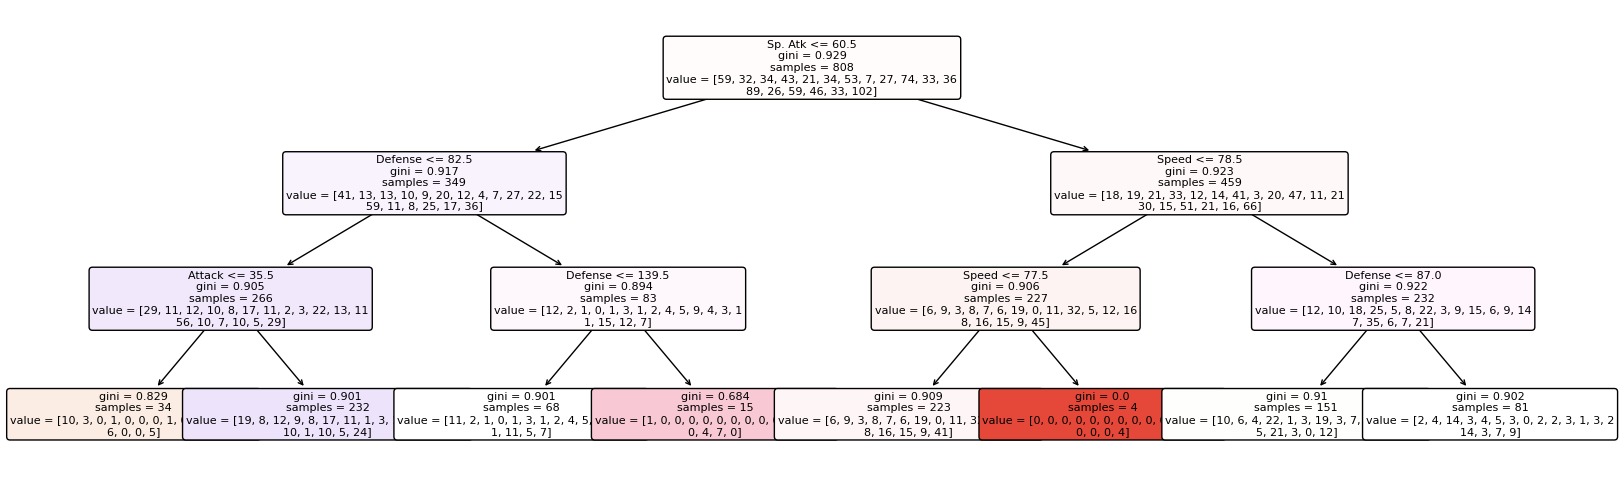

In [ ]:
features = feature_list_pokemon # Nombres de cada columna
plt.figure(figsize=(20,6))
tree.plot_tree(classifier_tree_ho,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

*Este árbol de decisiones utiliza características específicas para clasificar instancias en diferentes clases, pero a comparacion del anterior esta hecho con los hiperparametros optimizados.*

# Metricas de Pokémon con hiperparámetros optimizados.

In [ ]:
# Predicciones en el conjunto de entrenamiento
y_pred_train_pokemon = clf__ctree_ho.predict(x_train_pokemon)

# Predicciones en el conjunto de prueb
y_pred_test_pokemon = clf__ctree_ho.predict(x_test_pokemon)

# Evaluación del rendimiento del modelo
precision_train = precision_score(y_test_pokemon, y_pred_test_pokemon, average='macro')
recall_train = recall_score(y_train_pokemon, y_pred_train_pokemon, average='macro')
accuracy_train = accuracy_score(y_train_pokemon, y_pred_train_pokemon)
f1_train = f1_score(y_train_pokemon, y_pred_train_pokemon, average='macro')

precision_test = precision_score(y_test_pokemon, y_pred_test_pokemon, average='macro', zero_division=1)
recall_test = recall_score(y_test_pokemon, y_pred_test_pokemon, average='macro')
accuracy_test = accuracy_score(y_test_pokemon, y_pred_test_pokemon)
f1_test = f1_score(y_test_pokemon, y_pred_test_pokemon, average='macro')

print("Metricas de el conjunto de entrenamiento")
print(f"Precisión: {precision_train:.2f}")
print(f"Exhaustividad: {recall_train:.2f}")
print(f"Exactitud: {accuracy_train:.2f}")
print(f"F1: {f1_train:.2f}")

print("\nMetricas de el conjunto de prueba")
print(f"Precisión: {precision_test:.2f}")
print(f"Exhaustividad: {recall_test:.2f}")
print(f"Exactitud: {accuracy_test:.2f}")
print(f"F1: {f1_test:.2f}")

Metricas de el conjunto de entrenamiento
Precisión: 0.06
Exhaustividad: 0.14
Exactitud: 0.20
F1: 0.09

Metricas de el conjunto de prueba
Precisión: 0.73
Exhaustividad: 0.12
Exactitud: 0.16
F1: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Precisión:**

- En el conjunto de entrenamiento, la precisión es extremadamente baja (0.06), lo que indica que, entre todas las instancias que el modelo clasificó como positivas, sólo el 6% eran correctas.
- En el conjunto de prueba, la precisión es mucho más alta (0.73), lo que podría indicar un sobreajuste. Esto es inusual, ya que generalmente la precisión es más alta en el conjunto de entrenamiento.

**Exhaustividad (Recall):**

- La exhaustividad en el conjunto de entrenamiento es baja (0.14), lo que sugiere que el modelo está capturando solo el 14% de las instancias positivas verdaderas.
- La exhaustividad en el conjunto de prueba es aún más baja (0.12), lo que confirma que el modelo está fallando en capturar instancias positivas en general.

**Exactitud (Accuracy):**

- La exactitud en el conjunto de entrenamiento es del 20%, lo cual es muy bajo y sugiere que el modelo está clasificando incorrectamente la mayoría de las instancias.
- La exactitud en el conjunto de prueba es incluso más baja (16%), indicando que el modelo no generaliza bien.

**F1 Score:**

- El F1 Score en el conjunto de entrenamiento es de 0.09, que es muy bajo, reflejando el pobre equilibrio entre precisión y exhaustividad.
- El F1 Score en el conjunto de prueba es de 0.08, también muy bajo y similar al conjunto de entrenamiento, lo que indica un desempeño deficiente del modelo en ambos conjuntos.




*El modelo tiene un desempeño muy pobre tanto en el conjunto de entrenamiento como en el de prueba, con métricas de precisión, exhaustividad, exactitud y F1 Score muy bajas.*

# Matriz de confusión

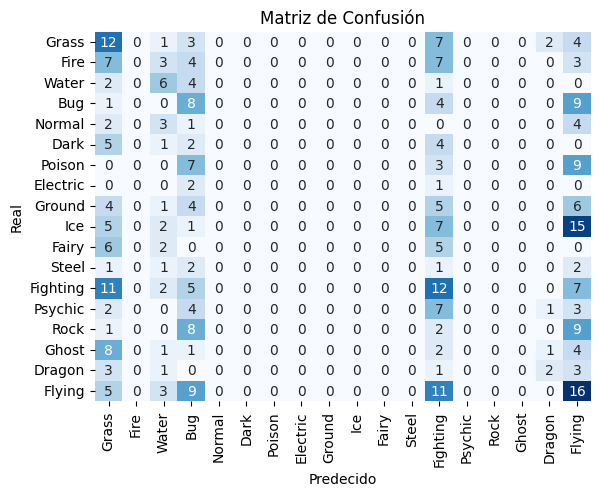

In [ ]:
y_pokemon_unique = PokemonDB['Type'].unique()

# Calculamos la matriz de confusión
con_mat = confusion_matrix(y_test_pokemon, y_pred_test_pokemon)

sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=y_pokemon_unique, yticklabels=y_pokemon_unique)
plt.xlabel('Predecido')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

La matriz compara los valores objetivo reales con los predichos por el modelo de aprendizaje automático, con filas que representan la clase real y columnas que representan la clase predicha.

Esta visualización es importante porque proporciona información sobre qué tan bien un modelo está prediciendo en diferentes clases y puede ayudar a identificar qué clases se están confundiendo con otras.


# Bayes Ingenuo

In [ ]:


# Discretizar los atributos
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
x_train_discretized = discretizer.fit_transform(x_train_pokemon)
x_test_discretized = discretizer.transform(x_test_pokemon)

# Entrenar el modelo de Bayes Ingenuo
nb = GaussianNB()
nb.fit(x_train_discretized, y_train_pokemon)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = nb.predict(x_train_discretized)
y_pred_test = nb.predict(x_test_discretized)

# Definir función de métricas con zero_division=1
scorer = make_scorer(precision_score, average='macro', zero_division=1)

# Calcular métricas de evaluación
precision_train = precision_score(y_train_pokemon, y_pred_train, average='macro', zero_division=1)
recall_train = recall_score(y_train_pokemon, y_pred_train, average='macro', zero_division=1)
accuracy_train = accuracy_score(y_train_pokemon, y_pred_train)

precision_test = precision_score(y_test_pokemon, y_pred_test, average='macro', zero_division=1)
recall_test = recall_score(y_test_pokemon, y_pred_test, average='macro', zero_division=1)
accuracy_test = accuracy_score(y_test_pokemon, y_pred_test)

# Imprimir las métricas de evaluación
print(f"Precisión en el conjunto de entrenamiento: {precision_train:.2f}")
print(f"Exhaustividad en el conjunto de entrenamiento: {recall_train:.2f}")
print(f"Exactitud en el conjunto de entrenamiento: {accuracy_train:.2f}")

print(f"Precisión en el conjunto de prueba: {precision_test:.2f}")
print(f"Exhaustividad en el conjunto de prueba: {recall_test:.2f}")
print(f"Exactitud en el conjunto de prueba: {accuracy_test:.2f}")



Precisión en el conjunto de entrenamiento: 0.40
Exhaustividad en el conjunto de entrenamiento: 0.18
Exactitud en el conjunto de entrenamiento: 0.21
Precisión en el conjunto de prueba: 0.45
Exhaustividad en el conjunto de prueba: 0.12
Exactitud en el conjunto de prueba: 0.15


*Precisión en el conjunto de entrenamiento (Training Precision): 0.40*

Esta métrica indica la proporción de instancias clasificadas como positivas que fueron realmente positivas en el conjunto de entrenamiento. En este caso, el modelo tiene una precisión del 36%, lo que significa que alrededor del 40% de las instancias clasificadas como positivas fueron clasificadas correctamente.


Exhaustividad en el conjunto de entrenamiento (Training Recall): 0.18

La exhaustividad representa la proporción de instancias positivas que fueron correctamente identificadas por el modelo en el conjunto de entrenamiento. Aquí, el valor de exhaustividad es del 18%, lo que indica que el modelo capturó solo el 18% de todas las instancias positivas en el conjunto de entrenamiento.


Exactitud en el conjunto de entrenamiento (Training Accuracy): 0.21

La exactitud es la proporción de instancias correctamente clasificadas sobre el total de instancias en el conjunto de entrenamiento. En este caso, la exactitud es del 21%, lo que significa que el 21% de las instancias se clasificaron correctamente en el conjunto de entrenamiento.


Precisión en el conjunto de prueba (Test Precision): 0.45

Esta métrica indica la proporción de instancias clasificadas como positivas que fueron realmente positivas en el conjunto de prueba. Aquí, el modelo tiene una precisión del 45%, lo que significa que alrededor del 45% de las instancias clasificadas como positivas fueron clasificadas correctamente en el conjunto de prueba.


Exhaustividad en el conjunto de prueba (Test Recall): 0.12

La exhaustividad en el conjunto de prueba representa la proporción de instancias positivas que fueron correctamente identificadas por el modelo en el conjunto de prueba. Aquí, el valor de exhaustividad es del 12%, lo que indica que el modelo capturó solo el 12% de todas las instancias positivas en el conjunto de prueba.


Exactitud en el conjunto de prueba (Test Accuracy): 0.15

La exactitud es la proporción de instancias correctamente clasificadas sobre el total de instancias en el conjunto de prueba. En este caso, la exactitud es del 15%, lo que significa que el 15% de las instancias se clasificaron correctamente en el conjunto de prueba.


Estas métricas muestran que el modelo de Bayes Ingenuo tiene un rendimiento limitado en la clasificación de instancias, tanto en el conjunto de entrenamiento como en el de prueba.
La baja exhaustividad indica que el modelo no está capturando adecuadamente las instancias positivas, lo que puede ser problemático dependiendo del contexto de aplicación.


# K-NN

In [ ]:
#Definir los hiperparámetros a ajustar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2]  # Para métrica de Minkowski: p=1 para Manhattan, p=2 para Euclidiana
}

#Instanciar el clasificador k-NN y la búsqueda en cuadrícula
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajustar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(x_train_pokemon, y_train_pokemon)

# Obtener el mejor modelo y los mejores parámetros
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_knn.predict(x_test_pokemon)
precision = precision_score(y_test_pokemon, y_pred, average='macro')
recall = recall_score(y_test_pokemon, y_pred, average='macro')
accuracy = accuracy_score(y_test_pokemon, y_pred)

print("Mejores hiperparámetros encontrados:", best_params)
print(f"Precisión en el conjunto de prueba: {precision:.2f}")
print(f"Exhaustividad en el conjunto de prueba: {recall:.2f}")
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")


Mejores hiperparámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1}
Precisión en el conjunto de prueba: 0.12
Exhaustividad en el conjunto de prueba: 0.13
Exactitud en el conjunto de prueba: 0.16


**Precisión (Precision): 0.12**

La precisión es baja, lo que indica que solo el 12% de las predicciones positivas del modelo son correctas. En otras palabras, el modelo tiene una alta tasa de falsos positivos, clasificando incorrectamente muchas instancias como positivas cuando no lo son.

**Exhaustividad (Recall): 0.13**

La exhaustividad también es baja, sugiriendo que el modelo solo está identificando el 13% de todas las instancias positivas verdaderas. Esto significa que el modelo tiene una alta tasa de falsos negativos, no logrando identificar muchas instancias que realmente son positivas.

**Exactitud (Accuracy): 0.16**

La exactitud es igualmente baja, indicando que el modelo solo clasifica correctamente el 16% de todas las instancias. Esto es un reflejo de que el modelo tiene un desempeño general muy pobre, con una alta proporción de errores en sus predicciones.

**Conclusiones**

Las métricas indican que el modelo tiene un rendimiento muy pobre en general. Ninguna de las métricas clave (precisión, exhaustividad, exactitud) alcanza un nivel aceptable para la mayoría de las aplicaciones prácticas.
